In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import math
CSS = """
.output {
    flex-direction: row;
}
td {font-size: 15px}
"""

HTML('<style>{}</style>'.format(CSS))

# Entropy

In [100]:
y = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])
y

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [101]:
print(sum(y==0))
print(sum(y==1))

12
8


$H(CL) = - \sum_{y \in CL}p(y)log_2p(y) =$ <br>
$- p(y=0)*log_2p(y=0)$<br>
$- p(y=1)*log_2p(y=1)$

$H(CL) = - \frac{12}{20} * log_2 \frac{12}{20} - \frac{8}{20} * log_2 \frac{8}{20}$

$log_2 \frac{12}{20} = -0.7369655941662062$<br>
$log_2 \frac{8}{20} = -1.3219280948873622$

$H(CL) = -(-0.6*0.7369655941662062 + - 0.4*1.3219280948873622) = 0.9709505944546686$

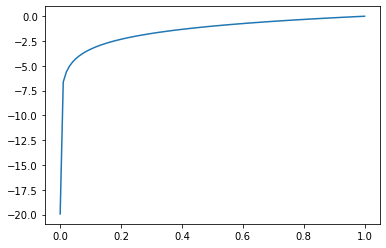

In [102]:
x = np.linspace(0.000001,1,100)
y = np.log2(x)
plt.plot(x,y)

# Conditional Entropy

  $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$

In [103]:
X = pd.DataFrame(np.random.randint(0,2,(15,3)))
X = pd.DataFrame(np.array([[0, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 1],
       [0, 1, 1],
       [1, 1, 0],
       [0, 0, 0],
       [0, 1, 0]]))
Y = pd.Series([0]*10+[1]*5)
X['CL']=Y

In [104]:
def _color_green(val):
    if val == 1:
        return 'background-color: green'
    else:
        return ''

In [105]:

display(X.style.applymap(_color_green).format("{:.2g}"))


,0,1,2,CL
0,0,0,1,0
1,0,1,1,0
2,0,0,1,0
3,1,0,1,0
4,1,0,0,0
5,1,1,1,0
6,1,0,0,0
7,1,1,1,0
8,0,0,1,0
9,0,0,1,0


|$\sum x$|$p(x)$|$p(x,y)$|||
|---|---|---|---|---|
|||$y=0$|$y=1$|
|$\sum (x_0=0) = 9$|$p(x_0=0) = \frac{9}{15}$ |$p(x_0=0,y=0) = \frac{5}{15}$|$p(x_0=0,y=1) = \frac{4}{15}$|
|$\sum (x_0=1) = 6$|$p(x_0=1) = \frac{6}{15}$ |$p(x_0=1,y=0) = \frac{5}{15}$|$p(x_0=1,y=1) = \frac{1}{15}$|
|$\sum (x_1=0) = 8$|$p(x_1=0) = \frac{8}{15}$ |$p(x_1=0,y=0) = \frac{7}{15}$|$p(x_1=0,y=1) = \frac{1}{15}$|
|$\sum (x_1=1) = 7$|$p(x_1=1) = \frac{7}{15}$ |$p(x_1=1,y=0) = \frac{3}{15}$|$p(x_1=1,y=1) = \frac{4}{15}$|
|$\sum (x_2=0) = 5$|$p(x_2=0) = \frac{5}{15}$ |$p(x_2=0,y=0) = \frac{2}{15}$|$p(x_2=0,y=1) = \frac{3}{15}$|
|$\sum (x_2=1) = 10$|$p(x_2=1) = \frac{10}{15}$ |$p(x_2=1,y=0) = \frac{8}{15}$|$p(x_2=1,y=1) = \frac{2}{15}$|

In [106]:
display(X[X[0]==0].style.applymap(_color_green).format("{:.2g}"))

,0,1,2,CL
0,0,0,1,0
1,0,1,1,0
2,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,1,1,1
11,0,1,1,1
13,0,0,0,1
14,0,1,0,1


|$\sum x$|$p(x)$|$\frac{p(x,y)}{p(x)}$|||
|---|---|---|---|---|
|||$y=0$|$y=1$|
|$\sum (x_0=0) = 9$|$p(x_0=0) = \frac{9}{15}$ |$\frac{p(x_0=0,y=0)}{p(x_0=0)} = \frac{5}{9}$|$\frac{p(x_0=0,y=1)}{p(x_0=0)} = \frac{4}{9}$|
|$\sum (x_0=1) = 6$|$p(x_0=1) = \frac{6}{15}$ |$\frac{p(x_0=1,y=0)}{p(x_0=1)} = \frac{5}{6}$|$\frac{p(x_0=1,y=1)}{p(x_0=1)} = \frac{1}{6}$|
|$\sum (x_1=0) = 8$|$p(x_1=0) = \frac{8}{15}$ |$\frac{p(x_1=0,y=0)}{p(x_1=0)} = \frac{7}{8}$|$\frac{p(x_1=0,y=1)}{p(x_1=0)} = \frac{1}{8}$|
|$\sum (x_1=1) = 7$|$p(x_1=1) = \frac{7}{15}$ |$\frac{p(x_1=1,y=0)}{p(x_1=1)} = \frac{3}{7}$|$\frac{p(x_1=1,y=1)}{p(x_1=1)} = \frac{4}{7}$|
|$\sum (x_2=0) = 5$|$p(x_2=0) = \frac{5}{15}$ |$\frac{p(x_2=0,y=0)}{p(x_2=0)} = \frac{2}{5}$|$\frac{p(x_2=0,y=1}{p(x_2=0)}) = \frac{3}{5}$|
|$\sum (x_2=1) = 10$|$p(x_2=1) = \frac{10}{15}$ |$\frac{p(x_2=1,y=0)}{p(x_2=1)} = \frac{8}{10}$|$\frac{p(x_2=1,y=1)}{p(x_2=1)} = \frac{2}{10}$|

  $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$

$H(CL|x_0) = $ <br>
$- p(x_0=0,y=0) * log_2 \frac{p(x_0=0,y=0)}{p(x_0=0)}$<br><br>
$- p(x_0=0,y=1)) * log_2 \frac{p(x_0=0,y=1)}{p(x_0=0)}$<br><br>
$- p(x_0=1,y=0) * log_2 \frac{p(x_0=1,y=0)}{p(x_0=1)}$<br><br>
$- p(x_0=1,y=1)) * log_2 \frac{p(x_0=1,y=1)}{p(x_0=1)}$<br>

$H(CL|x_0) = $ <br>
$- \frac{5}{15} * log_2 \frac{5}{9}$<br><br>
$- \frac{4}{15} * log_2 \frac{4}{9}$<br><br>
$- \frac{5}{15} * log_2 \frac{5}{6}$<br><br>
$- \frac{1}{15} * log_2 \frac{1}{6}$<br>

In [107]:
#H(CL|x_0) =
-5/15*math.log2(5/9)-4/15*math.log2(4/9)-5/15*math.log2(5/6)-1/15*math.log2(1/6)

0.8546546045622749

$H(CL|x_1) =0.7497$<br>
$H(CL|x_2) =0.8049$<br>



$H(CL|CL) =0$

# InformationGain

$InformationGain(X) = H(CL)-H(CL|X)$ <br>

$H(CL) = 0.9183$<br>

$InformationGain(x_0) = 0.9183 - 0.8547 = 0.0636$<br>
$InformationGain(x_1) = 0.9183 - 0.7497 = 0.1686$<br>
$InformationGain(x_2) = 0.9183 - 0.8049 = 0.1134$<br>

In [117]:
display(X[X[0]==0].style.applymap(_color_green).format("{:.2g}"))
display(X[X[0]==1].style.applymap(_color_green).format("{:.2g}"))

,0,1,2,CL
0,0,0,1,0
1,0,1,1,0
2,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,1,1,1
11,0,1,1,1
13,0,0,0,1
14,0,1,0,1


,0,1,2,CL
3,1,0,1,0
4,1,0,0,0
5,1,1,1,0
6,1,0,0,0
7,1,1,1,0
12,1,1,0,1


In [118]:
display(X[X[1]==0].style.applymap(_color_green).format("{:.2g}"))
display(X[X[1]==1].style.applymap(_color_green).format("{:.2g}"))

,0,1,2,CL
0,0,0,1,0
2,0,0,1,0
3,1,0,1,0
4,1,0,0,0
6,1,0,0,0
8,0,0,1,0
9,0,0,1,0
13,0,0,0,1


,0,1,2,CL
1,0,1,1,0
5,1,1,1,0
7,1,1,1,0
10,0,1,1,1
11,0,1,1,1
12,1,1,0,1
14,0,1,0,1


In [119]:
display(X[X[2]==0].style.applymap(_color_green).format("{:.2g}"))
display(X[X[2]==1].style.applymap(_color_green).format("{:.2g}"))

,0,1,2,CL
4,1,0,0,0
6,1,0,0,0
12,1,1,0,1
13,0,0,0,1
14,0,1,0,1


,0,1,2,CL
0,0,0,1,0
1,0,1,1,0
2,0,0,1,0
3,1,0,1,0
5,1,1,1,0
7,1,1,1,0
8,0,0,1,0
9,0,0,1,0
10,0,1,1,1
11,0,1,1,1
